# ゼロから作るDeep Learning

## 4章 ニューラルネットワークの学習

### 4.5 学習アルゴリズムの実装

#### 4.5.1 2層ニューラルネットワークのクラス

2層のニューラルネットワーク（隠れ層が1層のニューラルネットワーク）を対象に、MNISTデータセットを使って学習を行う

In [2]:

%cd ../deep-learning-from-scratch/ch04

/mnt/wd500/gotowork/workspace/study-dl-from-scratch/deep-learning-from-scratch/ch04


In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

In [4]:
class TwoLayerNet:
    # このクラスで使用する変数
    ## params : ニューラルネットワークのパラメータを保持するディクショナリ変数（インスタンス変数）
    ##          params['W1']は1層目の重み、params['b1']は1層目のバイアス。
    ##          params['W2']は2層目の重み、params['b2']は2層目のバイアス。
    #
    ## grads : 勾配を保持するディクショナリ変数（numerical_gradient()メソッドの返り値）
    ##         grads['W1']は1層目の重みの勾配、grads['b1']は1層目のバイアスの勾配。
    ##         grads['W2']は2層目の重みの勾配、grads['b2']は2層目のバイアスの勾配。
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    

#### 一つ例を見てみる

In [6]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # 今の層（入力層）のニューロン数×次の層（隠れ層）ニューロン数の行列になる
print(net.params['b1'].shape) # 次の層（隠れ層）のニューロン数の行列になる
print(net.params['W2'].shape) # 今の層（隠れ層）のニューロン数×次の層（出力層）のニューロン数の行列になる
print(net.params['b2'].shape) # 次の層（出力層）のニューロン数の行列になる

(784, 100)
(100,)
(100, 10)
(10,)


#### 推論処理の例

In [7]:
x = np.random.rand(100, 784) # ダミーの入力データ（１００枚分）
y = net.predict(x)

In [8]:
x

array([[0.05656624, 0.19617819, 0.10486648, ..., 0.42354662, 0.35273118,
        0.87174438],
       [0.57755882, 0.48298945, 0.21353107, ..., 0.38059549, 0.23743903,
        0.33146339],
       [0.46275798, 0.02757556, 0.42526475, ..., 0.39976671, 0.15884461,
        0.55388627],
       ...,
       [0.13981253, 0.78022038, 0.24436076, ..., 0.94848046, 0.21790573,
        0.32274977],
       [0.39965894, 0.56755264, 0.24788565, ..., 0.28554599, 0.77706347,
        0.87499767],
       [0.50886433, 0.67234244, 0.37372261, ..., 0.51165776, 0.82388759,
        0.78253123]])

In [9]:
y

array([[0.0959692 , 0.09629166, 0.09979841, 0.09871939, 0.11098569,
        0.101662  , 0.09740745, 0.10014477, 0.10529902, 0.09372241],
       [0.0960181 , 0.09635296, 0.09954321, 0.09883072, 0.11141286,
        0.10196294, 0.09756556, 0.09961232, 0.10519653, 0.09350482],
       [0.09610602, 0.09622185, 0.09965249, 0.09874341, 0.111017  ,
        0.10171183, 0.09757746, 0.10022934, 0.10529124, 0.09344936],
       [0.0960031 , 0.09620877, 0.09979786, 0.09865434, 0.11064326,
        0.10164532, 0.09758329, 0.10009401, 0.10551626, 0.0938538 ],
       [0.09573872, 0.09627769, 0.09979617, 0.09875095, 0.11092637,
        0.10193495, 0.09753129, 0.10013841, 0.10541893, 0.09348653],
       [0.09608266, 0.09623521, 0.09996819, 0.09863595, 0.11083231,
        0.10199436, 0.09737278, 0.10024432, 0.10516339, 0.09347084],
       [0.0962095 , 0.09621766, 0.0997767 , 0.09886011, 0.11125865,
        0.10178827, 0.09723453, 0.100102  , 0.10513272, 0.09341986],
       [0.09611028, 0.09621453, 0.0993199

In [10]:
x = np.random.rand(100, 784) # ダミーの入力データ(100枚分)
t = np.random.rand(100, 10)  # ダミーの正解ラベル(100枚分)

grads = net.numerical_gradient(x, t) # 勾配を計算  5分くらいかかった

In [11]:
grads['W1'].shape 

(784, 100)

In [12]:
grads['b1'].shape

(100,)

In [13]:
grads['W2'].shape 

(100, 10)

In [14]:
grads['b2'].shape

(10,)

#### 4.5.2 ミニバッチ学習の実装

In [15]:
import numpy as np
from dataset.mnist import load_mnist

In [16]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [17]:
# ハイパーパラメータ
#iters_num = 10000
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [18]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [19]:
from datetime import datetime
for i in range(iters_num):
    print(datetime.now(),i,"start")
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    print(datetime.now(),i, "calculating gradient..")
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = nework.gradient(..) # 高速版
    
    # パラメータの更新
    print(datetime.now(),i, "updating params..")
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 学習経過の記録
    print(datetime.now(),i,"recording loss..")
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
# 10時間以上経っても終わらず。
# 10ループなら11.5分程度。


2021-11-17 11:57:03.417784 0 start
2021-11-17 11:57:03.588130 0 calculating gradient..
2021-11-17 11:57:38.746525 0 updating params..
2021-11-17 11:57:38.748177 0 recording loss..
2021-11-17 11:57:38.750788 1 start
2021-11-17 11:57:38.751992 1 calculating gradient..
2021-11-17 11:58:18.206202 1 updating params..
2021-11-17 11:58:18.207569 1 recording loss..
2021-11-17 11:58:18.209202 2 start
2021-11-17 11:58:18.210329 2 calculating gradient..
2021-11-17 11:58:56.034166 2 updating params..
2021-11-17 11:58:56.035545 2 recording loss..
2021-11-17 11:58:56.036913 3 start
2021-11-17 11:58:56.038012 3 calculating gradient..
2021-11-17 11:59:32.658367 3 updating params..
2021-11-17 11:59:32.659685 3 recording loss..
2021-11-17 11:59:32.661057 4 start
2021-11-17 11:59:32.662023 4 calculating gradient..
2021-11-17 12:00:10.456674 4 updating params..
2021-11-17 12:00:10.458641 4 recording loss..
2021-11-17 12:00:10.461041 5 start
2021-11-17 12:00:10.462192 5 calculating gradient..
2021-11-17 12

- 0:01:15 / loop
- 75sec / loop
- 10,000 loopだと
  - 750,000 sec
  - 10,250 min
  - 170.8 hour


### 4.5.3 テストデータで評価

In [5]:
import numpy as np
from dataset.mnist import load_mnist

In [24]:
# ハイパーパラメータ
#iters_num = 10000
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [25]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
train_loss_list = []
train_acc_list = []
test_acc__list = []
# 1エポックあたりの繰り返し数
#iter_per_epoch = max(train_size / batch_size, 1)
iter_per_epoch = 10

print(train_size, batch_size, iter_per_epoch)


60000 100 10


In [26]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [27]:
from datetime import datetime
for i in range(iters_num):
    print(datetime.now(),"start",i)
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    print(datetime.now(),"calculating gradient..",i)
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = nework.gradient(..) # 高速版
    
    # パラメータの更新
    print(datetime.now(),"updating params..",i)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 学習経過の記録
    print(datetime.now(),"recording loss..",i)
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc__list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + "," +str(test_acc))


2021-11-19 19:26:35.675188 start 0
2021-11-19 19:26:35.677078 calculating gradient.. 0


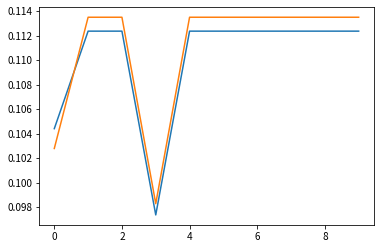

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_acc_list)), train_acc_list)
plt.plot(range(len(test_acc__list)), test_acc__list)
#range(len(train_acc_list))
#len(train_acc_list)
#train_acc_list
